In [29]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score,roc_curve

In [30]:
# dfcpu = pd.read_csv('../data/processed/cpu4.csv')
dfcpu = pd.read_csv('https://raw.githubusercontent.com/ChetanaRajabhoj/kagglex-project/main/data/processed/cpu4.csv')
dfcpu = dfcpu.sort_values(by='timestamp', ascending=True)
dfcpu = dfcpu.replace({'label': {0.0: False, 1.0: True}})

In [31]:
dfcpu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17568 entries, 0 to 17567
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17568 non-null  object 
 1   timestamp   17568 non-null  int64  
 2   value       17568 non-null  float64
 3   label       17568 non-null  bool   
 4   date        17568 non-null  object 
 5   time        17568 non-null  object 
 6   month       17568 non-null  object 
 7   day         17568 non-null  object 
 8   hour        17568 non-null  int64  
 9   minute      17568 non-null  int64  
 10  value(t-1)  17567 non-null  float64
 11  value(t-2)  17566 non-null  float64
 12  value(t-3)  17565 non-null  float64
 13  value(t-4)  17564 non-null  float64
 14  value(t-5)  17563 non-null  float64
 15  hour_1      17568 non-null  int64  
 16  hour_2      17568 non-null  int64  
 17  hour_3      17568 non-null  int64  
 18  hour_4      17568 non-null  int64  
 19  hour_5      17568 non-nul

# Rule Based Model


In [32]:
dfcpu['pred'] = (dfcpu.value <-1.5) | (dfcpu.value > 2.9)

In [33]:
dfcpu.head()

,datetime,timestamp,value,label,date,time,month,day,hour,minute,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour.1,hour_sin,hour_cos,pred
0,2016-07-24 16:00:00,1469376000,0.847300,False,2016-07-24,16:00:00,July,Sunday,16,0,...,0,0,0,0,0,0,16,-0.866025,-0.5,False
1,2016-07-24 16:05:00,1469376300,-0.036137,False,2016-07-24,16:05:00,July,Sunday,16,5,...,0,0,0,0,0,0,16,-0.866025,-0.5,False
2,2016-07-24 16:10:00,1469376600,0.074292,False,2016-07-24,16:10:00,July,Sunday,16,10,...,0,0,0,0,0,0,16,-0.866025,-0.5,False
3,2016-07-24 16:15:00,1469376900,0.074292,False,2016-07-24,16:15:00,July,Sunday,16,15,...,0,0,0,0,0,0,16,-0.866025,-0.5,False
4,2016-07-24 16:20:00,1469377200,-0.036137,False,2016-07-24,16:20:00,July,Sunday,16,20,...,0,0,0,0,0,0,16,-0.866025,-0.5,False


In [34]:
print(dfcpu.label.value_counts())
print(dfcpu.label.value_counts(normalize=True))

False    17359
True       209
Name: label, dtype: int64
False    0.988103
True     0.011897
Name: label, dtype: float64


In [35]:
print(dfcpu.pred.value_counts())
print(dfcpu.pred.value_counts(normalize=True))

False    17109
True       459
Name: pred, dtype: int64
False    0.973873
True     0.026127
Name: pred, dtype: float64


In [36]:
# print(" Accuracy: ",accuracy_score(dfcpu['label'], dfcpu['pred']))
print(" Recall: ",recall_score(dfcpu['label'], dfcpu['pred']))
print(" Precision: ",precision_score(dfcpu['label'], dfcpu['pred']))

 Recall:  0.5645933014354066
 Precision:  0.2570806100217865


In [37]:
dfcpu.date.max()

'2016-09-23'

In [38]:
train = dfcpu.loc[dfcpu.date < '2016-09-01'][['value', 'label', 'pred']]
test = dfcpu.loc[dfcpu.date >= '2016-09-01'][['value', 'label', 'pred']]

print(test.pred.value_counts())
X_train = np.array(train.value).reshape(-1,1)
y_train = np.array(train.label)
X_test = np.array(test.value).reshape(-1,1) 
y_test = np.array(test.label)
y_pred = np.array(test.pred)


False    6446
True       82
Name: pred, dtype: int64


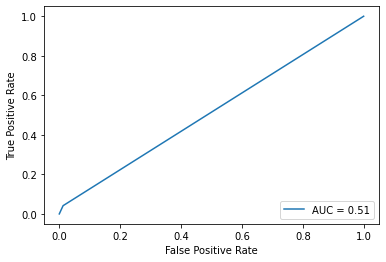

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()